### **Preguntas teóricas**

1) ¿Ante qué tipo de operaciones se puede ejecutar un Trigger en SQL?

*El trigger se ejecuta ante las operaciones Insert, Update o Delete*

2) ¿Cuál es la diferencia entre una vista y una vista materializada?

Las vistas son objetos dinamicos, ejecutan una query y muestran el resultado en tiempo real
Mientras que las vistas materializadas son una "foto" de un momento en particular del resultado de la query
La gran diferencia es que la vista materializada guarda el resultado en una tabla, y persiste mas alla de los cambios que se hagan en las demas tablas de la query?

Que pro y contra le ven? para que usarian una tabla materializada?

3) ¿Cómo harías para quedarte con las primeras tres letras de una palabra en SQL?

*SELECT SUBSTRING("palabra", 1,3);*

### **Preguntas prácticas**

Dataset disponible en : https://www.kaggle.com/datasets/franvaluch/properati-dataset

En el siguiente link, podrán encontrar toda la información correspondiente a los datos: https://www.properati.com.ar/data

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#data = pd.read_csv(r"C:\Users\leand\Downloads\archive\DS_Proyecto_01_Datos_Properati.csv")

In [3]:
data.head(2)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta


1) ¿Qué porcentaje del total de propiedades publicadas corresponden a la zona sur del Gran Buenos Aires?

In [30]:
print('El porcentaje de propiedades publicadas en el sur del GBA es:', round((data.l2.value_counts()[2] / data.shape[0]) * 100, 2), '%')

El porcentaje de propiedades publicadas en el sur del GBA es: 11.71 %


2) ¿En qué barrio se encuentra la propiedad más cara?

In [141]:
data['l3'][data.price == data.price.max()].values

array(['Palermo'], dtype=object)

3) Reagrupe las propiedades por el precio promedio de cada barrio

In [34]:
data[['l3', 'price']].groupby('l3').mean().sort_values('price')

,price
l3,
José C Paz,91501.874564
Constitución,104534.073840
Villa Soldati,122472.463768
Avellaneda,127272.403650
Boca,128428.273504
...,...
Belgrano,376293.661283
Recoleta,410252.230184
Las Cañitas,469045.204056


4) Señale los 5 barrios con la mayor media de precios

In [48]:
barrios = data.groupby('l3').mean().sort_values('price', ascending=False).head(5)
list(barrios.index)

['Puerto Madero', 'Villa Riachuelo', 'Las Cañitas', 'Recoleta', 'Belgrano']

5) Graficar un histograma que muestre la distribución del precio de las casas ubicadas en el barrio de Almagro

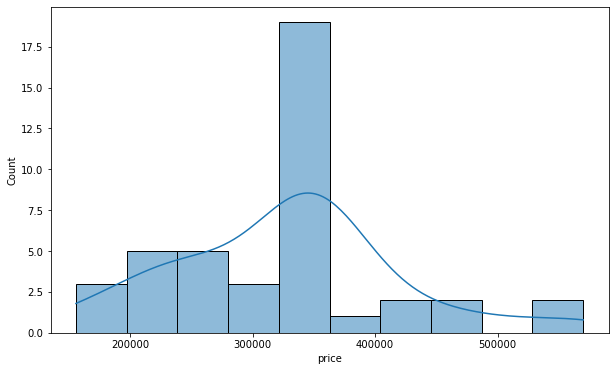

In [321]:
plt.figure(figsize= (10,6))
sns.histplot(x = 'price', data = data[(data.property_type == 'Casa') & (data.l3 == 'Almagro')] , kde = True, bins = 10)
plt.show()

6) Realizar un diagrama de barras para la cantidad de habitaciones

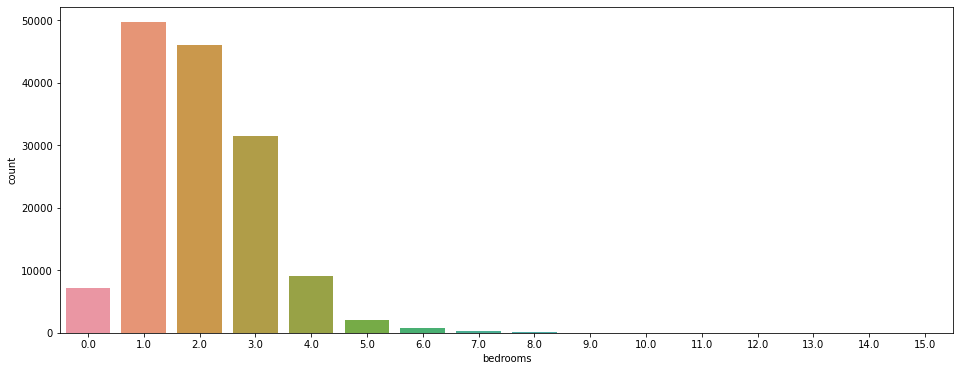

In [166]:
plt.figure(figsize=(16,6))
sns.countplot(x = 'bedrooms', data = data)
plt.show()

7) Considerando la técnica del rango intercuartílico, ¿cuántos outliers tiene la variable `surface_total`?

In [49]:
Q1 = data['surface_total'].quantile(0.25)
Q3 = data['surface_total'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR
out = (data['surface_total']<BI) | (data['surface_total']>BS)
print('La cantidad de outliers para el atributo surface_total es :', out.sum())

La cantidad de outliers para el atributo surface_total es : 13452


8. ¿Cuál es el precio promedio del m2 (metro cuadrado) en barrio Palermo?

In [50]:
data['price/m2'] = data.price / data.surface_total

In [62]:
palermo = data[data['l3'] == 'Palermo']

In [72]:
print('En promedio, el metro cuadrado en barrio Palermo vale :', int(palermo['price/m2'].mean()) , 'USD')

En promedio, el metro cuadrado en barrio Palermo vale : 3528 USD
